## 전자상거래 배송 데이터 분석하기

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Train.csv to Train.csv


In [ ]:
import pandas as pd
import io

data = pd.read_csv(io.StringIO(uploaded['Train.csv'].decode('utf8')))
data = data.drop(['ID'], axis = 1)
data.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [ ]:
data.info() #결측치 없음 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 945.4+ KB


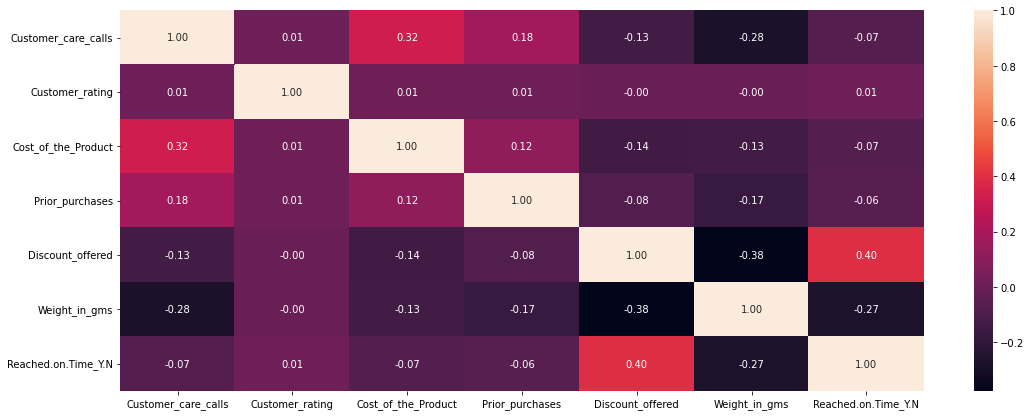

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (18, 7))
sns.heatmap(data.corr(), annot = True, fmt = '0.2f')
plt.show()

칼럼별 상관관계
* Discount_offered - Reached on Time_YN 양의 상관관계 40%
* Cost_of_the_Product - Customer_care_calls 양의 상관관계 32%
* Discount_offered - Weight_in_gms 음의 상관관계 38%
* Customer_care_calls - Weight_in_gms 음의 상관관계 28%
* Reached on Time_YN - Weight_in_gms 음의 상관관계 27%


창고블럭 이용 수 확인

In [ ]:
data['Warehouse_block'].value_counts()

F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64

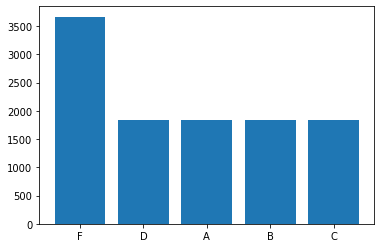

In [ ]:
import matplotlib.pyplot as plt

plt.bar(data['Warehouse_block'].value_counts().index, data['Warehouse_block'].value_counts())
plt.show()

Text(0, 0.5, '')

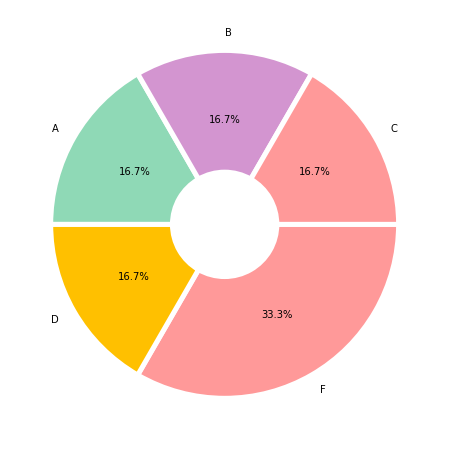

In [ ]:
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.figure(figsize=(8, 8))
data['Warehouse_block'].value_counts().plot(kind = "pie", autopct = '%1.1f%%', colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0'], counterclock = False, wedgeprops = wedgeprops)
plt.ylabel("")

* f 창고 블럭 타 창고 블럭에 비해 확연히 많이 이용.

배송 방법 이용

In [ ]:
data['Mode_of_Shipment'].value_counts()

Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64

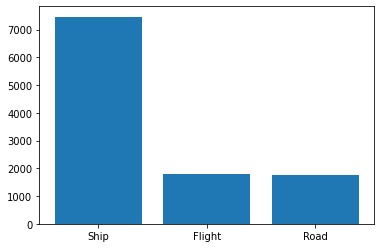

In [ ]:
import matplotlib.pyplot as plt

plt.bar(data['Mode_of_Shipment'].value_counts().index, data['Mode_of_Shipment'].value_counts())
plt.show()

Text(0, 0.5, '')

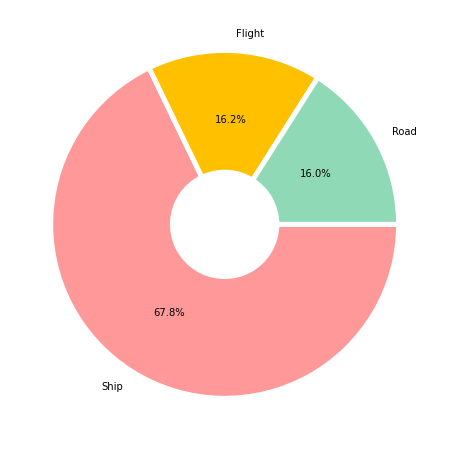

In [ ]:
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.figure(figsize=(8, 8))
data['Mode_of_Shipment'].value_counts().plot(kind = "pie", autopct = '%1.1f%%', colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0'], counterclock = False, wedgeprops = wedgeprops)
plt.ylabel("")

* ship 배송법이 타 배송 방법에 비해 뚜렷하게 많다.

고객 지원 전화

In [ ]:
data['Customer_care_calls'].value_counts()

4    3557
3    3217
5    2328
6    1013
2     638
7     246
Name: Customer_care_calls, dtype: int64

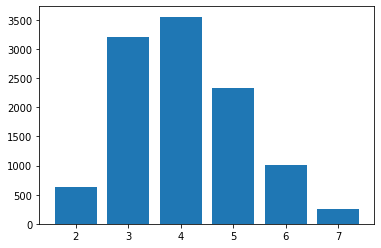

In [ ]:
import matplotlib.pyplot as plt

plt.bar(data['Customer_care_calls'].value_counts().index, data['Customer_care_calls'].value_counts())
plt.show()

Text(0, 0.5, '')

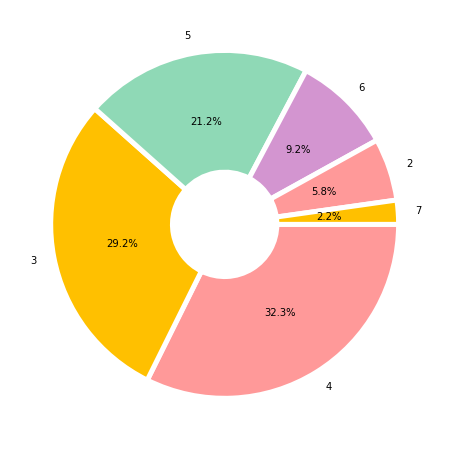

In [ ]:
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.figure(figsize=(8, 8))
data['Customer_care_calls'].value_counts().plot(kind = "pie", autopct = '%1.1f%%', colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0'], counterclock = False, wedgeprops = wedgeprops)
plt.ylabel("")

* 고객 전화 4번이 다수

In [ ]:
data['Customer_rating'].value_counts()

3    2239
1    2235
4    2189
5    2171
2    2165
Name: Customer_rating, dtype: int64

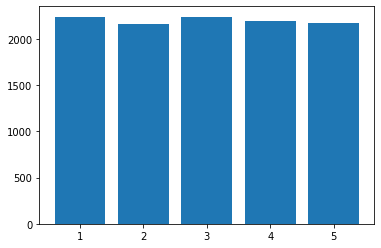

In [ ]:
import matplotlib.pyplot as plt

plt.bar(data['Customer_rating'].value_counts().index, data['Customer_rating'].value_counts())
plt.show()

Text(0, 0.5, '')

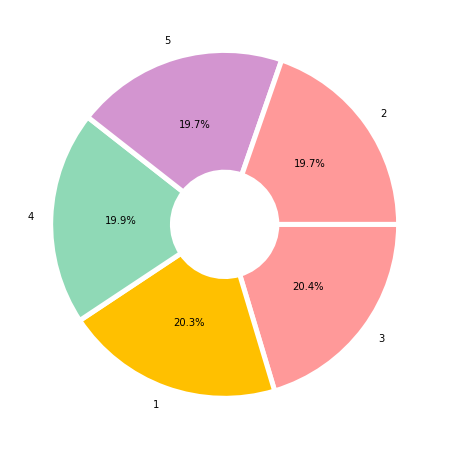

In [ ]:
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.figure(figsize=(8, 8))
data['Customer_rating'].value_counts().plot(kind = "pie", autopct = '%1.1f%%', colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0'], counterclock = False, wedgeprops = wedgeprops)
plt.ylabel("")

* 거의 다 비슷비슷

In [ ]:
data['Prior_purchases'].value_counts()

3     3955
2     2599
4     2155
5     1287
6      561
10     178
7      136
8      128
Name: Prior_purchases, dtype: int64

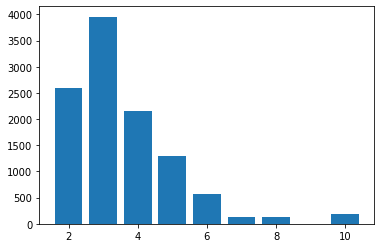

In [ ]:
import matplotlib.pyplot as plt

plt.bar(data['Prior_purchases'].value_counts().index, data['Prior_purchases'].value_counts())
plt.show()

Text(0, 0.5, '')

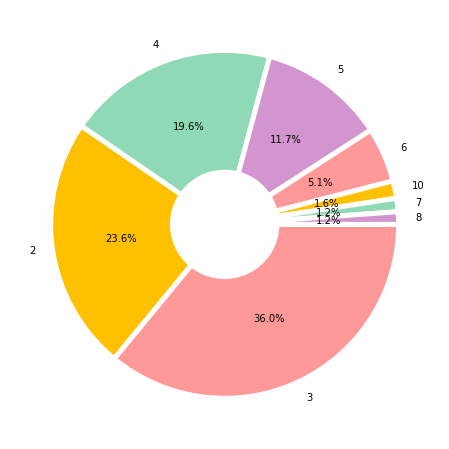

In [ ]:
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.figure(figsize=(8, 8))
data['Prior_purchases'].value_counts().plot(kind = "pie", autopct = '%1.1f%%', colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0'], counterclock = False, wedgeprops = wedgeprops)
plt.ylabel("")

* 보통 3번 정도 구매이력이 있다.

In [ ]:
data['Product_importance'].value_counts()

low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64

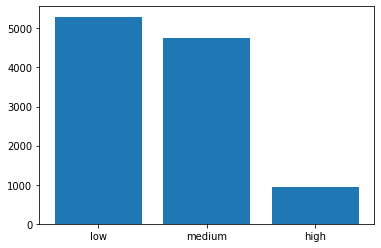

In [ ]:
import matplotlib.pyplot as plt

plt.bar(data['Product_importance'].value_counts().index, data['Product_importance'].value_counts())
plt.show()

Text(0, 0.5, '')

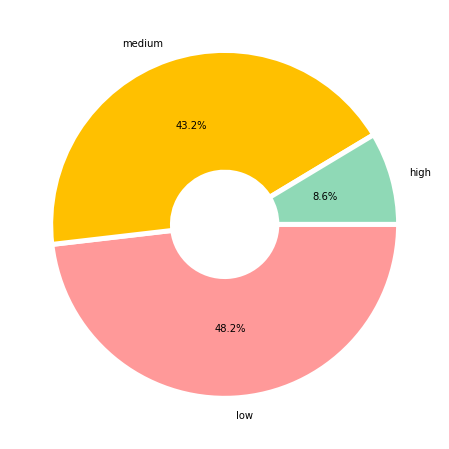

In [ ]:
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.figure(figsize=(8, 8))
data['Product_importance'].value_counts().plot(kind = "pie", autopct = '%1.1f%%', colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0'], counterclock = False, wedgeprops = wedgeprops)
plt.ylabel("")

* 상품들의 중요도가 낮다.

In [ ]:
data['Gender'].value_counts()

F    5545
M    5454
Name: Gender, dtype: int64

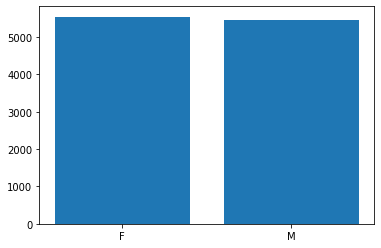

In [ ]:
import matplotlib.pyplot as plt

plt.bar(data['Gender'].value_counts().index, data['Gender'].value_counts())
plt.show()

Text(0, 0.5, '')

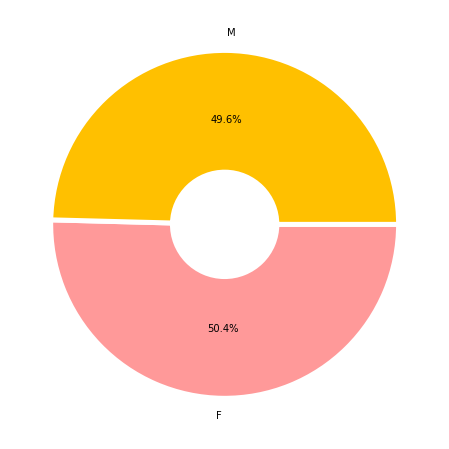

In [ ]:
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.figure(figsize=(8, 8))
data['Gender'].value_counts().plot(kind = "pie", autopct = '%1.1f%%', colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0'], counterclock = False, wedgeprops = wedgeprops)
plt.ylabel("")

* 성별의 비율은 차이가 없다.

In [ ]:
data['Reached.on.Time_Y.N'].value_counts()

1    6563
0    4436
Name: Reached.on.Time_Y.N, dtype: int64

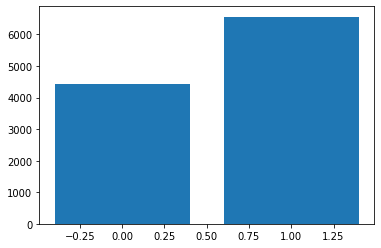

In [ ]:
import matplotlib.pyplot as plt

plt.bar(data['Reached.on.Time_Y.N'].value_counts().index, data['Reached.on.Time_Y.N'].value_counts())
plt.show()

Text(0, 0.5, '')

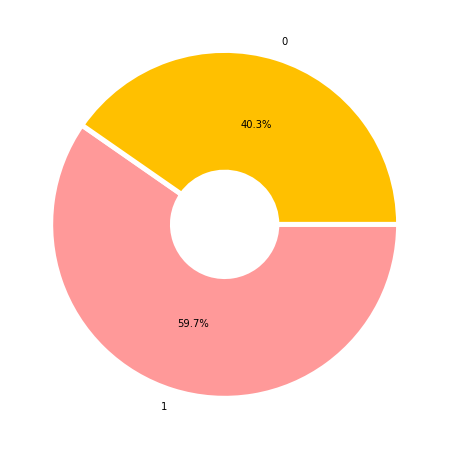

In [ ]:
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.figure(figsize=(8, 8))
data['Reached.on.Time_Y.N'].value_counts().plot(kind = "pie", autopct = '%1.1f%%', colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0'], counterclock = False, wedgeprops = wedgeprops)
plt.ylabel("")

* 대부분 제시간에 도착하지 않았다.

<Discount_offered - Reached on Time_YN>

<Cost_of_the_Product - Customer_care_calls>

<Discount_offered - Weight_in_gms>

<Customer_care_calls - Weight_in_gms>

<Reached on Time_YN - Weight_in_gms>

- 고객 평가는 무엇인지?
- 제품이 제 시간에 배송되었는지?
- 고객 문의에 답변이 되고 있는지?
- 제품 중요도가 높은 경우, 가장 높은 평가를 받거나 정시에 배달되고 있는지?

- 